### Initial Data Exploration
- Load the dataset using Pandas. Check for null values and understand data types.
- Examine the time series properties of the data (e.g., frequency, trends).

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#

stock_prices = pd.read_csv('/content/AAPL, 1D 01012007-12072023.csv')
stock_prices.tail(5)

,volume,vwap,open,close,high,low,time,transactions
4154,45155523.0,190.8214,189.84,191.8100,192.02,189.200,1688616000,562755
4155,46757498.0,191.4218,191.41,190.6800,192.67,190.240,1688702400,538826
4156,59912163.0,188.3628,189.26,188.6100,189.99,187.035,1688961600,736912
4157,46638119.0,187.8219,189.16,188.0800,189.30,186.600,1689048000,577717
4158,36423657.0,190.0251,189.68,190.0099,191.70,188.470,1689134400,500776


In [81]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [82]:
stock_prices['Date'] = pd.to_datetime(stock_prices['time'], unit='s')
stock_prices.head()

,volume,vwap,open,close,high,low,time,transactions,Date
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00


### Data Visualization
- Utilize Matplotlib to plot closing prices and traded volume over time.
- Create a candlestick chart to depict high and low prices.

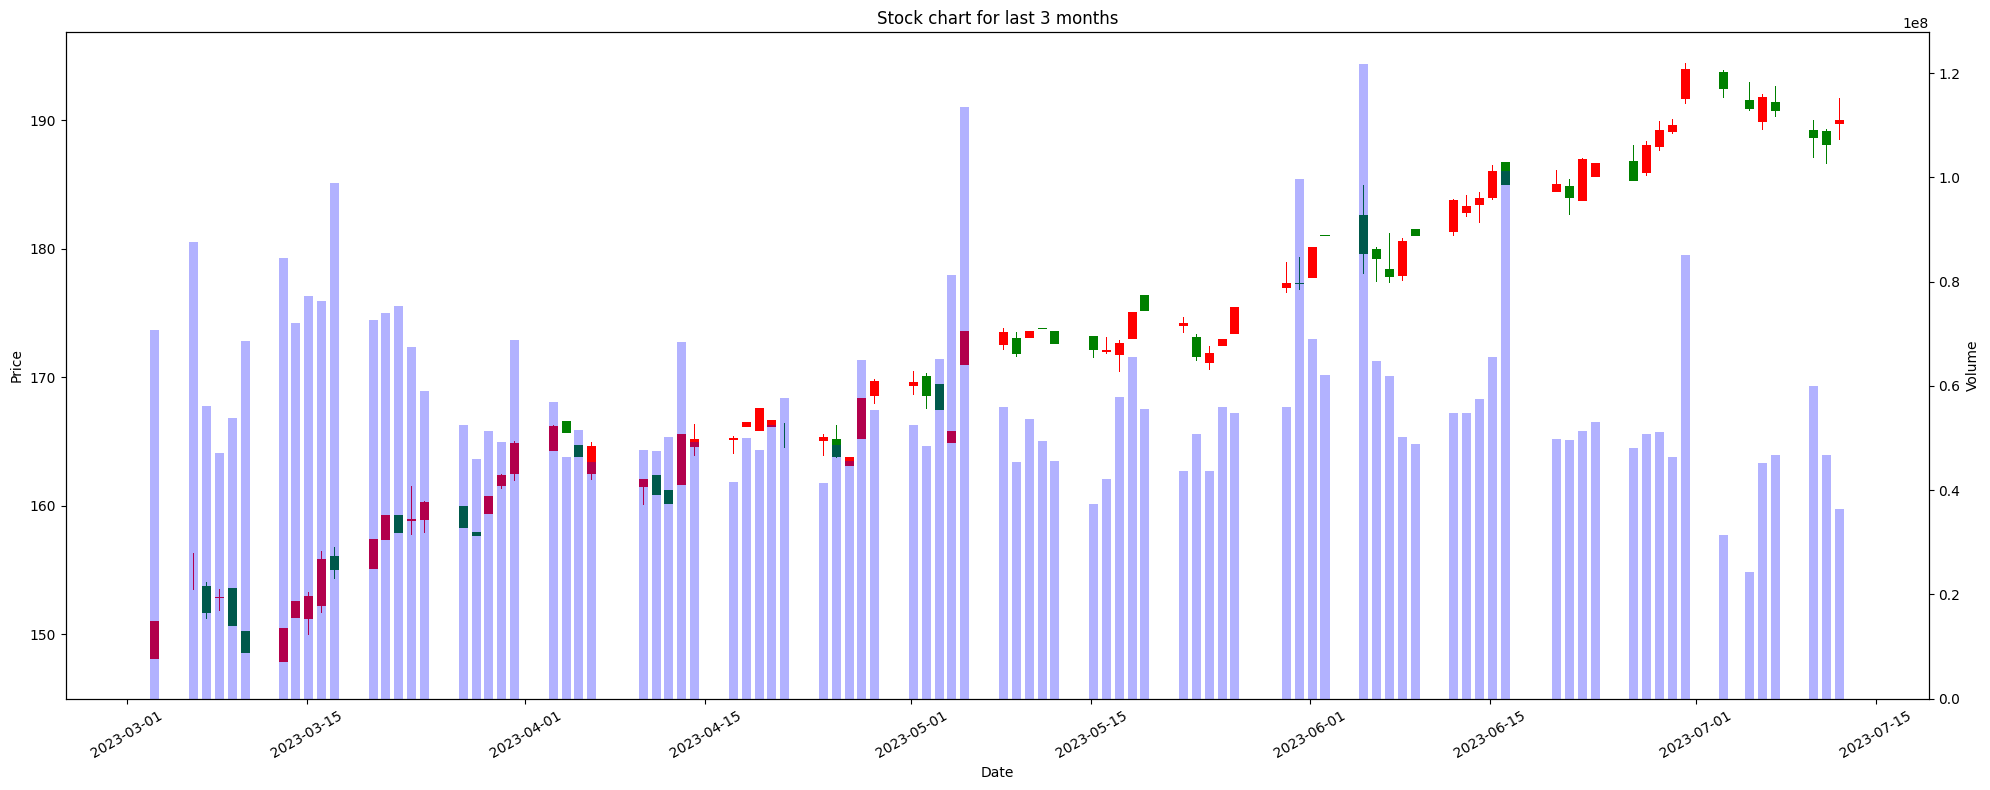

In [83]:
days_candles = stock_prices[-90:]

fig, ax1 = plt.subplots(figsize=(20,8))


# up when the closing stock price is greater than or equal to the opening stock prices
up = days_candles[days_candles.close >= days_candles.open]

# down  when the closing stock price is lesser than the opening stock prices
down = days_candles[days_candles.close < days_candles.open]

# color when the stock prices have decreased
col1 = 'red'

# color when the stock prices have increased
col2 = 'green'

# Setting width of candlestick elements
width = .7
width2 = .05

# Plotting up prices of the stock
ax1.bar(up['Date'], up.close-up.open, width, bottom=up.open, color=col1)
ax1.bar(up['Date'], up.high-up.close, width2, bottom=up.close, color=col1)
ax1.bar(up['Date'], up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
ax1.bar(down['Date'], down.close-down.open, width, bottom=down.open, color=col2)
ax1.bar(down['Date'], down.high-down.open, width2, bottom=down.open, color=col2)
ax1.bar(down['Date'], down.low-down.close, width2, bottom=down.close, color=col2)

# Set the labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock chart for last 3 months')
ax1.tick_params(axis='x', rotation=30)

# Create a secondary y-axis for the volume plot
ax2 = ax1.twinx()
ax2.set_ylabel('Volume')

# Plotting the volume as bars
ax2.bar(days_candles['Date'], days_candles['volume'], width, alpha=0.3, color='blue')

# Display the plot
fig.tight_layout()
plt.show()


The same plot for monthly frequency

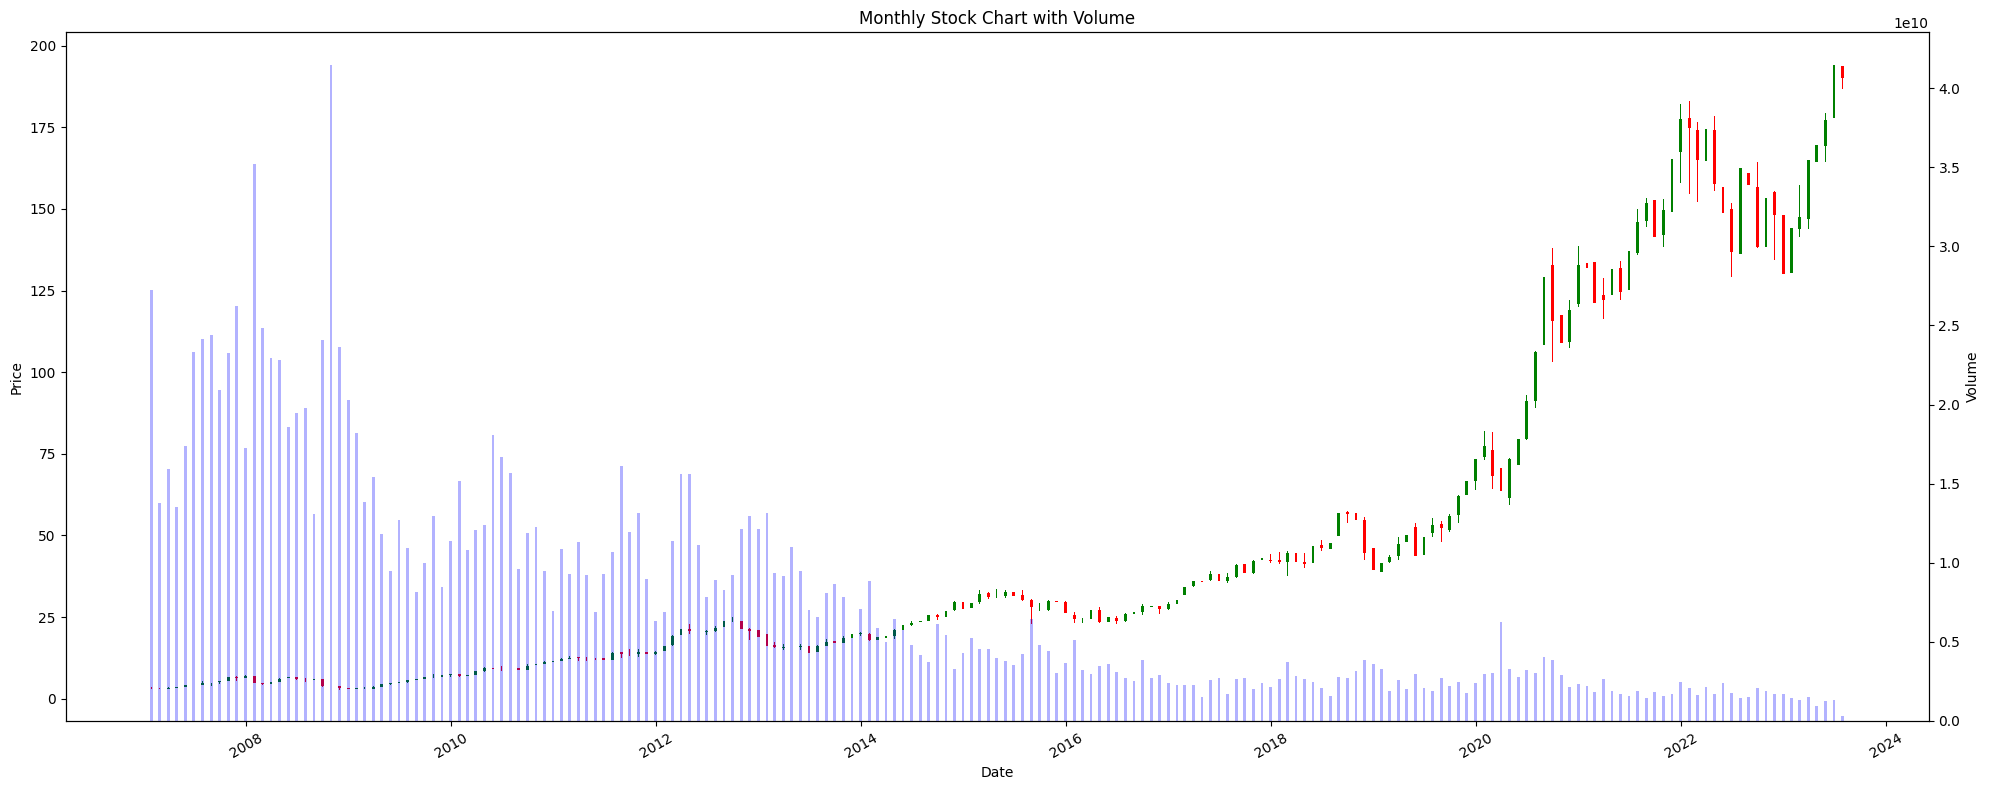

In [84]:
monthly = stock_prices.resample('M', on='Date').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

fig, ax1 = plt.subplots(figsize=(20,8))

up = monthly[monthly.close >= monthly.open]
down = monthly[monthly.close < monthly.open]
col1 = 'green'
col2 = 'red'

width = 10
width2 = 2

ax1.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
ax1.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
ax1.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

ax1.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
ax1.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
ax1.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Monthly Stock Chart with Volume')
ax1.tick_params(axis='x', rotation=30)

ax2 = ax1.twinx()
ax2.set_ylabel('Volume')

ax2.bar(monthly.index, monthly['volume'], width, alpha=0.3, color='blue')

fig.tight_layout()
plt.show()

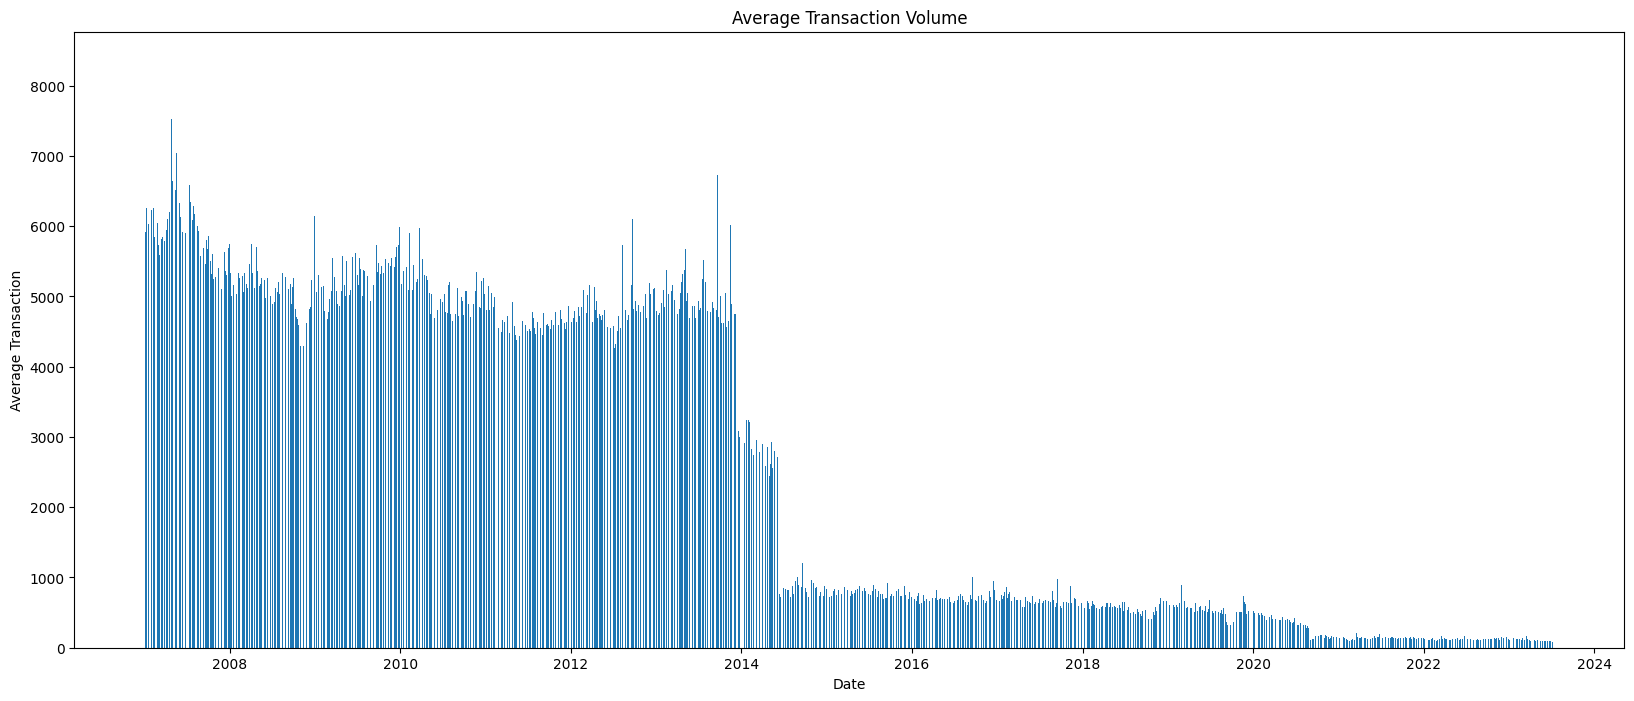

In [85]:
stock_prices['avg_transaction'] = stock_prices['volume'] / stock_prices['transactions']
plt.figure(figsize=(20,8))
plt.bar(stock_prices['Date'], stock_prices['avg_transaction'])
plt.xlabel('Date')
plt.ylabel('Average Transaction')
plt.title('Average Transaction Volume')
plt.show()

As can be seen in the chart, the price has been rising over time while the volumes are decreasing. Futhermore, the average amount per transaction has also significantly decreased.

### Statistical Analysis
- Compute summary statistics (mean, median, standard deviation) for key columns.
- Analyze closing prices with a moving average.

In [86]:
for col in stock_prices.columns[:-3]:
  mean = stock_prices[col].mean()
  median = stock_prices[col].median()
  var = stock_prices[col].var()
  std = stock_prices[col].std()
  print(f"Mean of {col}: {mean}")
  print(f"Median of {col}: {median}")
  print(f"Variance of {col}: {var}")
  print(f"Standard Deviation of {col}: {std}")

Mean of volume: 366292450.04688627
Median of volume: 213646276.0
Variance of volume: 1.3874081481307608e+17
Standard Deviation of volume: 372479281.05208224
Mean of vwap: 46.39138203895167
Median of vwap: 25.8852
Variance of vwap: 2527.832772746457
Standard Deviation of vwap: 50.27755734665774
Mean of open: 46.362787713392635
Median of open: 25.775
Variance of open: 2523.6147763984277
Standard Deviation of open: 50.235592724665125
Mean of close: 46.39605770617938
Median of close: 25.825
Variance of close: 2529.4343703942736
Standard Deviation of close: 50.293482384840615
Mean of high: 46.88112704977158
Median of high: 26.2628
Variance of high: 2585.0995191309635
Standard Deviation of high: 50.84387395872745
Mean of low: 45.865790310170716
Median of low: 25.68
Variance of low: 2468.112709558879
Standard Deviation of low: 49.6801037595422
Mean of time: 1428315199.807646
Median of time: 1428465600.0
Variance of time: 2.265864298524067e+16
Standard Deviation of time: 150527881.0893207


In [87]:
stock_prices['50_MA'] = stock_prices['close'].rolling(window=50).mean()
stock_prices['50_MA'].fillna(3.125, inplace=True)

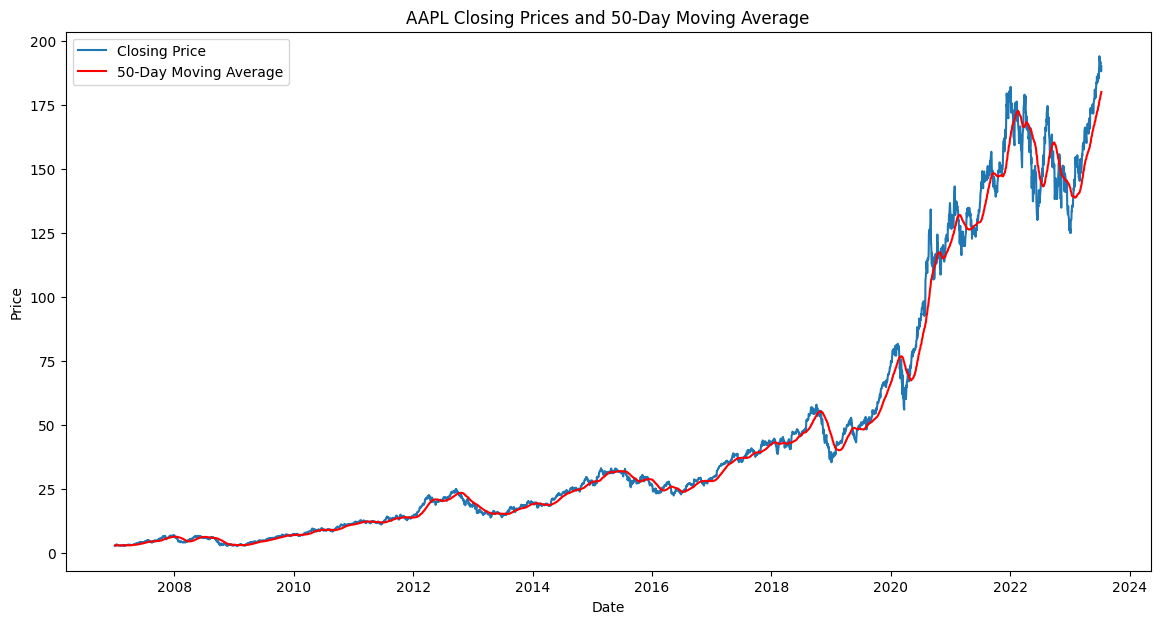

In [88]:
plt.figure(figsize=(14, 7))
plt.plot(stock_prices['Date'], stock_prices['close'], label='Closing Price')
plt.plot(stock_prices['Date'], stock_prices['50_MA'], label='50-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Closing Prices and 50-Day Moving Average')
plt.legend()
plt.show()

Below: 1390 days
Above: 2769 days


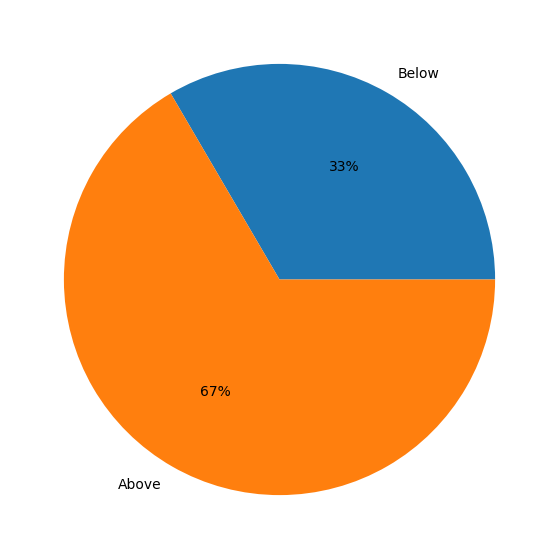

In [89]:
below = stock_prices[stock_prices['50_MA']>stock_prices['close']]['close'].count()
above = stock_prices[stock_prices['50_MA']<stock_prices['close']]['close'].count()
print(f"Below: {below} days")
print(f"Above: {above} days")

plt.figure(figsize=(14, 7))
plt.pie([below, above], labels=['Below', 'Above'], autopct='%1.0f%%')
plt.show()


Most of the time, the closing price is above the 50-day moving average.

### Hypothesis Testing
- Execute a t-test to compare average closing prices across different years.
- Examine daily returns’ distribution and test for normality using SciPy.

In [90]:
import scipy.stats as stats

stock_prices['Year'] = stock_prices['Date'].dt.year
year_1 = 2009
year_2 = 2010
avg_close_year_1 = stock_prices[stock_prices['Year'] == year_1]['close']
avg_close_year_2 = stock_prices[stock_prices['Year'] == year_2]['close']

In [91]:
# H0 The averages closing prices in 2009 and 2010 are equal.
# H1 The averages closing prices in 2009 and 2010 are not equal.
a = 0.05
t_stat, p_value = stats.ttest_ind(avg_close_year_1, avg_close_year_2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < a:
  print("p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in averege closing prices")
else:
  print("p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in averege closing prices")

# Daily returns
stock_prices['Daily_Return'] = stock_prices['close'].pct_change()

# Test for normality
k2, p = stats.normaltest(stock_prices['Daily_Return'].dropna())
print(f'Normality test p-value: {p}')

T-statistic: -32.7824589293039, P-value: 7.525529097558201e-127
p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in averege closing prices
Normality test p-value: 4.999563172686955e-117


I think that conducting a test with such a hypothesis is incorrect. As can be seen in the charts, Apple stocks have been rising over time, and naturally, the average price has been increasing all the time. Below, I have provided my hypothesis about the average trading volumes.

### Hypothesis Testing #2

In [92]:
# H0 The means of volume below the moving average and volume under the moving averege are equal
# H1 The means of volume below the moving average and volume under the moving averege are not equal

sample1 = np.random.choice(stock_prices[stock_prices['close'] < stock_prices['50_MA']]['volume'], size=1000)
sample2 = np.random.choice(stock_prices[stock_prices['close'] > stock_prices['50_MA']]['volume'], size=1000)

print(sample1.size, sample1.mean(), sample2.size, sample2.mean())

1000 424453297.86 1000 341422762.616


In [93]:
a = 0.05
t_stat, p_val = stats.ttest_ind(sample1, sample2)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")
if p_val < a:
  print("p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in trading volumes")
else:
  print("p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in trading volumes")

t-statistic: 4.65256447480383
p-value: 3.4932685828646858e-06
p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in trading volumes


In this case, we can conclude that there is a significant difference in trading volumes depending on whether the stock's closing price is above or below the 50-day moving average. This insight can be valuable for understanding trading behavior and making informed investment decisions.